# Prática 03
## Classificação

In [1]:
import numpy as np
import h5py

from random import shuffle

In [2]:
import matplotlib.pyplot as plt

from sklearn import metrics

In [3]:
def matriz(nRows):
    matriz = []
    for i in range(nRows):
        row = []
        matriz.append(row)
    return matriz

### Matrizes de features e vetores de classificação (X, y)

#### LBP

In [4]:
LBPtrain = "LBPtrain.h5"

with h5py.File(LBPtrain, "r") as hdf:
    
    x = list(hdf.keys())[0]
    Featurestrain = list(hdf[x])

shuffle(Featurestrain)
    
X_lbp = matriz(10000)
y_lbp = matriz(10000)

for i, rows in enumerate(Featurestrain):
    X_lbp[i] = Featurestrain[i][:3072]
    y_lbp[i] = Featurestrain[i][3072]

In [5]:
LBPtest = "LBPtest.h5"

with h5py.File(LBPtest, "r") as hdf:
    
    x = list(hdf.keys())[0]
    Featurestest = list(hdf[x])
    
shuffle(Featurestest)
    
Xt_lbp = matriz(10000)
yt_lbp = matriz(10000)

for i, rows in enumerate(Featurestest):
    Xt_lbp[i] = Featurestest[i][:3072]
    yt_lbp[i] = Featurestest[i][3072]

#### GLCM

In [6]:
GLCMtrain = "GLCMtrain.h5"

with h5py.File(GLCMtrain, "r") as hdf:
    
    x = list(hdf.keys())[0]
    Featurestrain = list(hdf[x])

shuffle(Featurestrain)
    
X_glcm = matriz(10000)
y_glcm = matriz(10000)

for i, rows in enumerate(Featurestrain):
    X_glcm[i] = Featurestrain[i][:48]
    y_glcm[i] = Featurestrain[i][48]

In [7]:
GLCMtest = "GLCMtest.h5"

with h5py.File(GLCMtest, "r") as hdf:
    
    x = list(hdf.keys())[0]
    Featurestest = list(hdf[x])
    
shuffle(Featurestest)
    
Xt_glcm = matriz(10000)
yt_glcm = matriz(10000)

for i, rows in enumerate(Featurestest):
    Xt_glcm[i] = Featurestest[i][:48]
    yt_glcm[i] = Featurestest[i][48]

#### SOBEL

In [8]:
SOBELtrain = "SOBELtrain.h5"

with h5py.File(SOBELtrain, "r") as hdf:
    
    x = list(hdf.keys())[0]
    Featurestrain = list(hdf[x])

shuffle(Featurestrain)
    
X_sobel = matriz(10000)
y_sobel = matriz(10000)

for i, rows in enumerate(Featurestrain):
    X_sobel[i] = Featurestrain[i][:6144]
    y_sobel[i] = Featurestrain[i][6144]

In [9]:
SOBELtest = "SOBELtest.h5"

with h5py.File(SOBELtest, "r") as hdf:
    
    x = list(hdf.keys())[0]
    Featurestest = list(hdf[x])
    
shuffle(Featurestest)
    
Xt_sobel = matriz(10000)
yt_sobel = matriz(10000)

for i, rows in enumerate(Featurestest):
    Xt_sobel[i] = Featurestest[i][:6144]
    yt_sobel[i] = Featurestest[i][6144]

### Roteiro I - SVM

In [10]:
from sklearn.svm import SVC

#### LBP

In [11]:
# Dados de treinamento

X_lbp = X_lbp[:5000]
y_lbp = y_lbp[:5000]

# Dados de teste

Xt_lbp = Xt_lbp[:5000]
yt_lbp = yt_lbp[:5000]

##### Model 01 - Linear - LBP

In [12]:
clf_lbp =  SVC(probability=True, kernel='linear')

clf_lbp.fit(X_lbp, y_lbp)                         

SVC(kernel='linear', probability=True)

In [13]:
y_pred_linear_lbp = clf_lbp.predict(Xt_lbp)

In [14]:
clf_lbp.score(Xt_lbp, yt_lbp)

0.538

In [15]:
clf_lbp.predict(X_lbp)

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [16]:
clf_lbp.score(X_lbp, y_lbp)

1.0

##### Model 02 - Polinomial - LBP

In [17]:
clf2_lbp =  SVC(probability=True, kernel='poly')

clf2_lbp.fit(X_lbp, y_lbp)                         

SVC(kernel='poly', probability=True)

In [18]:
y_pred_poly_lbp = clf2_lbp.predict(Xt_lbp)

In [19]:
clf2_lbp.score(Xt_lbp, yt_lbp)

0.5758

In [20]:
clf2_lbp.predict(X_lbp)

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [21]:
clf2_lbp.score(X_lbp, y_lbp)

1.0

##### Model 03 - RBF - LBP

In [22]:
clf3_lbp =  SVC(probability=True, kernel='rbf')

clf3_lbp.fit(X_lbp, y_lbp)                         

SVC(probability=True)

In [23]:
y_pred_rbf_lbp = clf3_lbp.predict(Xt_lbp)

In [24]:
clf3_lbp.score(Xt_lbp, yt_lbp)

0.6084

In [25]:
clf3_lbp.predict(X_lbp)

array([0, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [26]:
clf3_lbp.score(X_lbp, y_lbp)

0.9692

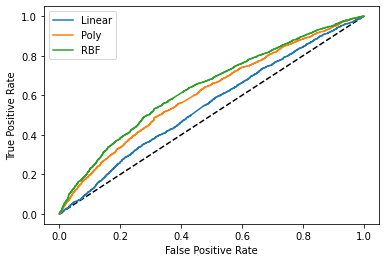

In [27]:
#ROC Curve

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_lbp, y_pred_prob2)

y_pred_prob3 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_lbp, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Linear")
plt.plot(fpr2, tpr2, label= "Poly")
plt.plot(fpr3, tpr3, label= "RBF")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')
plt.show()

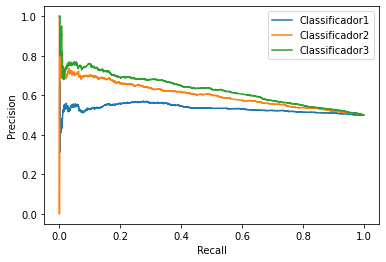

In [28]:
# PR - LBP

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_lbp, y_pred_prob2)

y_pred_prob3 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_lbp, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "Classificador1")
plt.plot(recall2, precision2, label= "Classificador2")
plt.plot(recall3, precision3, label= "Classificador3")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.show()

#### GLCM

In [29]:
# Dados de treinamento

X_glcm = X_glcm[:5000]
y_glcm = y_glcm[:5000]

# Dados de teste

Xt_glcm = Xt_glcm[:5000]
yt_glcm = yt_glcm[:5000]

##### Model 01 - Linear - GLCM 

In [30]:
clf_glcm =  SVC(probability=True, kernel='linear') # Modelo mais demorado para treinar!

clf_glcm.fit(X_glcm, y_glcm)                         

SVC(kernel='linear', probability=True)

In [31]:
y_pred_linear_glcm = clf_glcm.predict(Xt_glcm)

In [32]:
clf_glcm.score(Xt_glcm, yt_glcm)

0.524

In [33]:
clf_glcm.predict(X_glcm)

array([1, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [34]:
clf_glcm.score(X_glcm, y_glcm)

0.5478

##### Model 02 - Polinomial - GLCM

In [35]:
clf2_glcm =  SVC(probability=True, kernel='poly')

clf2_glcm.fit(X_glcm, y_glcm)                         

SVC(kernel='poly', probability=True)

In [36]:
y_pred_poly_glcm = clf2_glcm.predict(Xt_glcm)

In [37]:
clf2_glcm.score(Xt_glcm, yt_glcm)

0.9522

In [38]:
clf2_glcm.predict(X_glcm)

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [39]:
clf2_glcm.score(X_glcm, y_glcm)

0.9592

##### Model 03 - RBF - GLCM

In [40]:
clf3_glcm =  SVC(probability=True, kernel='rbf')

clf3_glcm.fit(X_glcm, y_glcm)                         

SVC(probability=True)

In [41]:
y_pred_rbf_glcm = clf3_glcm.predict(Xt_glcm)

In [42]:
clf3_glcm.score(Xt_glcm, yt_glcm)

0.9132

In [43]:
clf3_glcm.predict(X_glcm)

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [44]:
clf3_glcm.score(X_glcm, y_glcm)

0.9316

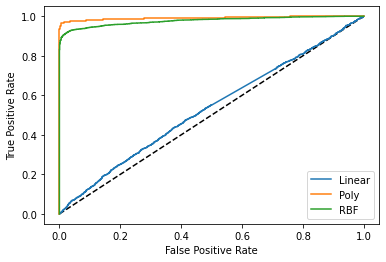

In [45]:
# ROC Curve - GLCM

y_pred_prob1 = clf_glcm.predict_proba(Xt_glcm)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_glcm, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_glcm, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Linear")
plt.plot(fpr2, tpr2, label= "Poly")
plt.plot(fpr3, tpr3, label= "RBF")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')
plt.show()

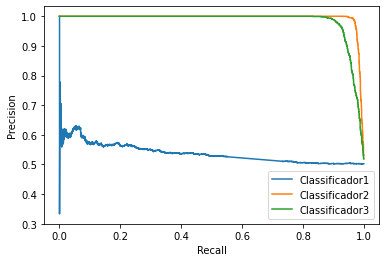

In [46]:
# PR - GLCM

y_pred_prob1 = clf_glcm.predict_proba(Xt_glcm)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_glcm, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_glcm, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "Classificador1")
plt.plot(recall2, precision2, label= "Classificador2")
plt.plot(recall3, precision3, label= "Classificador3")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.show()

#### SOBEL

In [47]:
# Dados de treinamento

X_sobel = X_sobel[:5000]
y_sobel = y_sobel[:5000]

# Dados de teste

Xt_sobel = Xt_sobel[:5000]
yt_sobel = yt_sobel[:5000]

##### Model 01 - Linear - SOBEL

In [48]:
clf_sobel =  SVC(probability=True, kernel='linear')

clf_sobel.fit(X_sobel, y_sobel)                         

SVC(kernel='linear', probability=True)

In [49]:
y_pred_linear_sobel = clf_sobel.predict(Xt_sobel)

In [50]:
clf_sobel.score(Xt_sobel, yt_sobel)

0.599

In [51]:
clf_sobel.predict(X_sobel)

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [52]:
clf_sobel.score(X_sobel, y_sobel)

1.0

##### Model 02 - Polinomial - SOBEL

In [53]:
clf2_sobel =  SVC(probability=True, kernel='poly')

clf2_sobel.fit(X_sobel, y_sobel)                         

SVC(kernel='poly', probability=True)

In [54]:
y_pred_poly_sobel = clf2_sobel.predict(Xt_sobel)

In [55]:
clf2_sobel.score(Xt_sobel, yt_sobel)

0.6594

In [56]:
clf2_sobel.predict(X_sobel)

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [57]:
clf2_sobel.score(X_sobel, y_sobel)

0.9722

##### Model 03 - RBF - SOBEL

In [58]:
clf3_sobel =  SVC(probability=True, kernel='rbf')

clf3_sobel.fit(X_sobel, y_sobel)                         

SVC(probability=True)

In [59]:
y_pred_rbf_sobel = clf3_sobel.predict(Xt_sobel)

In [60]:
clf3_sobel.score(Xt_sobel, yt_sobel)

0.6734

In [61]:
clf3_sobel.predict(X_sobel)

array([1, 1, 0, ..., 1, 0, 1], dtype=uint8)

In [62]:
clf3_sobel.score(X_sobel, y_sobel)

0.8936

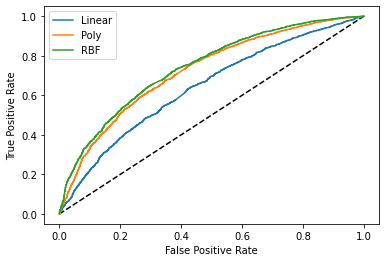

In [63]:
# ROC Curve - SOBEL

y_pred_prob1 = clf_sobel.predict_proba(Xt_sobel)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_sobel, y_pred_prob1)

y_pred_prob2 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_sobel, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Linear")
plt.plot(fpr2, tpr2, label= "Poly")
plt.plot(fpr3, tpr3, label= "RBF")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')
plt.show()

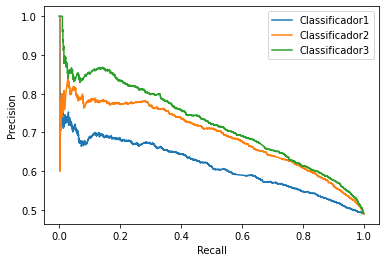

In [64]:
# PR - SOBEL

y_pred_prob1 = clf_sobel.predict_proba(Xt_sobel)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_sobel, y_pred_prob1)

y_pred_prob2 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_sobel, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "Classificador1")
plt.plot(recall2, precision2, label= "Classificador2")
plt.plot(recall3, precision3, label= "Classificador3")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.show()

### Roteiro II - MLP

In [10]:
from sklearn.neural_network import MLPClassifier

#### LBP

##### Model 01

In [11]:
clf_lbp = MLPClassifier(hidden_layer_sizes=(1024), activation='relu', random_state=1, early_stopping=True, batch_size=100)

clf_lbp.fit(X_lbp, y_lbp)

MLPClassifier(batch_size=100, early_stopping=True, hidden_layer_sizes=1024,
              random_state=1)

In [12]:
y_pred_1_lbp = clf_lbp.predict(Xt_lbp)

In [13]:
clf_lbp.score(Xt_lbp, yt_lbp)

0.5627

In [14]:
clf_lbp.predict(X_lbp)

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [15]:
clf_lbp.score(X_lbp, y_lbp)

0.7608

##### Model 02

In [16]:
clf2_lbp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', random_state=1, early_stopping=True, batch_size=100)

clf2_lbp.fit(X_lbp, y_lbp)                         

MLPClassifier(batch_size=100, early_stopping=True,
              hidden_layer_sizes=(128, 64, 32), random_state=1)

In [17]:
y_pred_3_lbp = clf2_lbp.predict(Xt_lbp)

In [18]:
clf2_lbp.score(Xt_lbp, yt_lbp)

0.5602

In [19]:
clf2_lbp.predict(X_lbp)

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [20]:
clf2_lbp.score(X_lbp, y_lbp)

0.7191

##### Model 03

In [21]:
clf3_lbp = MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32), activation='relu', random_state=1, early_stopping=True, batch_size=100)

clf3_lbp.fit(X_lbp, y_lbp)                         

MLPClassifier(batch_size=100, early_stopping=True,
              hidden_layer_sizes=(512, 256, 128, 64, 32), random_state=1)

In [22]:
y_pred_5_lbp = clf3_lbp.predict(Xt_lbp)

In [23]:
clf3_lbp.score(Xt_lbp, yt_lbp)

0.5802

In [24]:
clf3_lbp.predict(X_lbp)

array([1, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [25]:
clf3_lbp.score(X_lbp, y_lbp)

0.8351

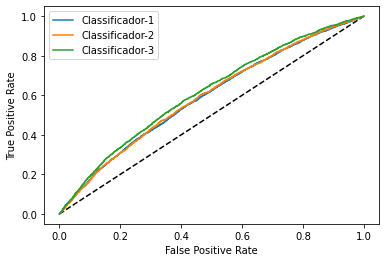

In [26]:
# ROC Curve - LBP

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_lbp, y_pred_prob2)

y_pred_prob3 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_lbp, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Classificador-1")
plt.plot(fpr2, tpr2, label= "Classificador-2")
plt.plot(fpr3, tpr3, label= "Classificador-3")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')
plt.show()

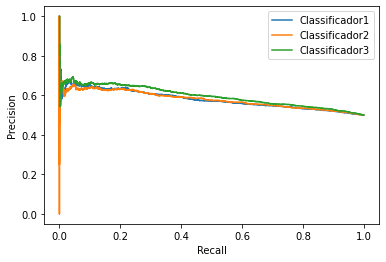

In [27]:
# PR - LBP

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_lbp, y_pred_prob2)

y_pred_prob3 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_lbp, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "Classificador1")
plt.plot(recall2, precision2, label= "Classificador2")
plt.plot(recall3, precision3, label= "Classificador3")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.show()

#### GLCM

##### Model 01

In [28]:
clf_glcm = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(1024), random_state=1, early_stopping=True, batch_size=100)

clf_glcm.fit(X_glcm, y_glcm)                         

MLPClassifier(alpha=1e-05, batch_size=100, early_stopping=True,
              hidden_layer_sizes=1024, random_state=1)

In [29]:
y_pred_1_glcm = clf_glcm.predict(Xt_glcm)

In [30]:
clf_glcm.score(Xt_glcm, yt_glcm)

0.9898

In [31]:
clf_glcm.predict(X_glcm)

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [32]:
clf_glcm.score(X_glcm, y_glcm)

0.9978

##### Model 02

In [33]:
clf2_glcm = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', random_state=1, early_stopping=True, batch_size=100)

clf2_glcm.fit(X_glcm, y_glcm)                         

MLPClassifier(batch_size=100, early_stopping=True,
              hidden_layer_sizes=(128, 64, 32), random_state=1)

In [34]:
y_pred_3_glcm = clf2_glcm.predict(Xt_glcm)

In [35]:
clf2_glcm.score(Xt_glcm, yt_glcm)

0.9922

In [36]:
clf2_glcm.predict(X_glcm)

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [37]:
clf2_glcm.score(X_glcm, y_glcm)

0.9977

##### Model 03

In [38]:
clf3_glcm = MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32), activation='relu', random_state=1, early_stopping=True, batch_size=100)

clf3_glcm.fit(X_glcm, y_glcm)                

MLPClassifier(batch_size=100, early_stopping=True,
              hidden_layer_sizes=(512, 256, 128, 64, 32), random_state=1)

In [39]:
y_pred_5_glcm = clf3_glcm.predict(Xt_glcm)

In [40]:
clf3_glcm.score(Xt_glcm, yt_glcm)

0.9934

In [41]:
clf3_glcm.predict(X_glcm)

array([0, 1, 0, ..., 0, 0, 1], dtype=uint8)

In [42]:
clf3_glcm.score(X_glcm, y_glcm)

0.9981

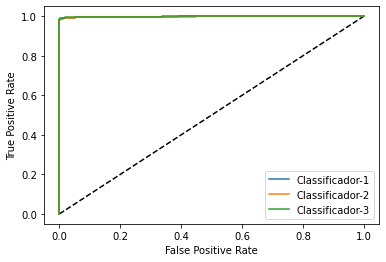

In [43]:
# ROC Curve - GLCM

y_pred_prob1 = clf_glcm.predict_proba(Xt_glcm)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_glcm, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_glcm, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Classificador-1")
plt.plot(fpr2, tpr2, label= "Classificador-2")
plt.plot(fpr3, tpr3, label= "Classificador-3")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')
plt.show()

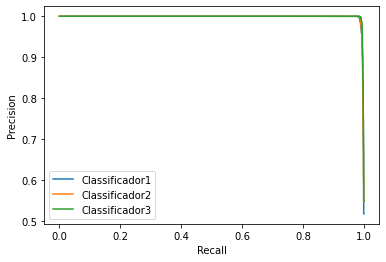

In [44]:
# PR - GLCM

y_pred_prob1 = clf_glcm.predict_proba(Xt_glcm)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_glcm, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_glcm, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "Classificador1")
plt.plot(recall2, precision2, label= "Classificador2")
plt.plot(recall3, precision3, label= "Classificador3")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.show()

#### SOBEL

##### Model 01

In [45]:
clf_sobel = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(1024), random_state=1, early_stopping=True, batch_size=100)

clf_sobel.fit(X_sobel, y_sobel)                         

MLPClassifier(alpha=1e-05, batch_size=100, early_stopping=True,
              hidden_layer_sizes=1024, random_state=1)

In [46]:
y_pred_1_sobel = clf_sobel.predict(Xt_sobel)

In [47]:
clf_sobel.score(Xt_sobel, yt_sobel)

0.6528

In [48]:
clf_sobel.predict(X_sobel)

array([1, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [49]:
clf_sobel.score(X_sobel, y_sobel)

0.7656

##### Model 02

In [50]:
clf2_sobel = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', random_state=1, early_stopping=True, batch_size=100)

clf2_sobel.fit(X_sobel, y_sobel)                         

MLPClassifier(batch_size=100, early_stopping=True,
              hidden_layer_sizes=(128, 64, 32), random_state=1)

In [51]:
y_pred_3_sobel = clf2_sobel.predict(Xt_sobel)

In [52]:
clf2_sobel.score(Xt_sobel, yt_sobel)

0.6557

In [53]:
clf2_sobel.predict(X_sobel)

array([1, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [54]:
clf2_sobel.score(X_sobel, y_sobel)

0.758

##### Model 03

In [55]:
clf3_sobel = MLPClassifier(hidden_layer_sizes=(512, 256, 128, 64, 32), activation='relu', random_state=1, early_stopping=True, batch_size=100)

clf3_sobel.fit(X_sobel, y_sobel)                

MLPClassifier(batch_size=100, early_stopping=True,
              hidden_layer_sizes=(512, 256, 128, 64, 32), random_state=1)

In [56]:
y_pred_5_sobel = clf3_sobel.predict(Xt_sobel)

In [57]:
clf3_sobel.score(Xt_sobel, yt_sobel)

0.6635

In [58]:
clf3_sobel.predict(X_sobel)

array([1, 0, 1, ..., 1, 1, 0], dtype=uint8)

In [59]:
clf3_sobel.score(X_sobel, y_sobel)

0.7732

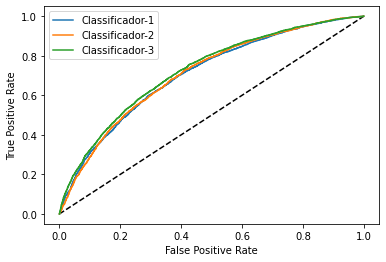

In [60]:
# ROC Curve - SOBEL

y_pred_prob1 = clf_sobel.predict_proba(Xt_sobel)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_sobel, y_pred_prob1)

y_pred_prob2 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_sobel, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Classificador-1")
plt.plot(fpr2, tpr2, label= "Classificador-2")
plt.plot(fpr3, tpr3, label= "Classificador-3")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')
plt.show()

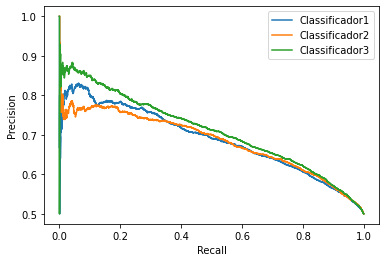

In [61]:
# PR - SOBEL

y_pred_prob1 = clf_sobel.predict_proba(Xt_sobel)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_sobel, y_pred_prob1)

y_pred_prob2 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_sobel, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "Classificador1")
plt.plot(recall2, precision2, label= "Classificador2")
plt.plot(recall3, precision3, label= "Classificador3")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.show()

# Prática 04
## Análise de Resultados

### Curva ROC - SVM

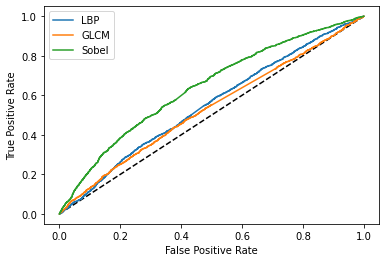

In [65]:
# SVM - linear

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/ROC-SVMlinear', format='png')
plt.show()

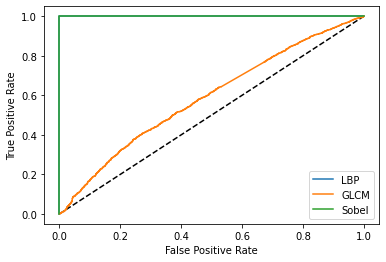

In [66]:
# SVM - linear - train

y_pred_prob1 = clf_lbp.predict_proba(X_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(y_lbp, y_pred_prob1)

y_pred_prob2 = clf_glcm.predict_proba(X_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(y_glcm, y_pred_prob2)

y_pred_prob3 = clf_sobel.predict_proba(X_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(y_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/ROC-SVMlinear-train', format='png')
plt.show()

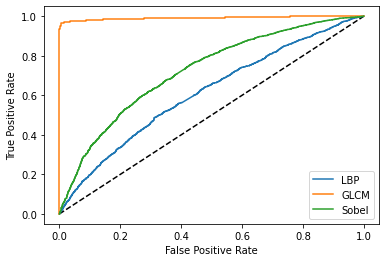

In [66]:
# SVM - polinomial

y_pred_prob1 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/ROC-SVM-poly', format='png')
plt.show()

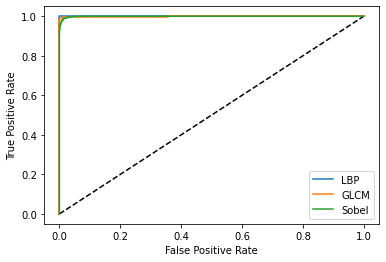

In [97]:
# SVM - polinomial - train

y_pred_prob1 = clf2_lbp.predict_proba(X_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(y_lbp, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(X_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(y_glcm, y_pred_prob2)

y_pred_prob3 = clf2_sobel.predict_proba(X_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(y_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/ROC-SVM-poly-train', format='png')
plt.show()

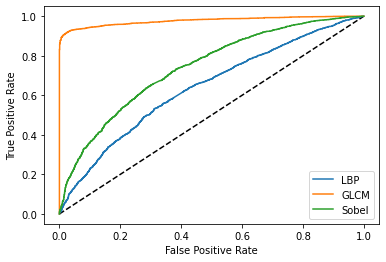

In [67]:
# SVM - rbf

y_pred_prob1 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/ROC-SVMrbf', format='png')
plt.show()

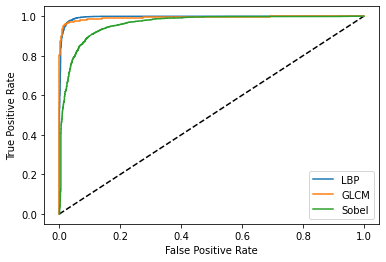

In [130]:
# SVM - rbf - train

y_pred_prob1 = clf3_lbp.predict_proba(X_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(y_lbp, y_pred_prob1)

y_pred_prob2 = clf3_glcm.predict_proba(X_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(y_glcm, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(X_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(y_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/ROC-SVMrbf-train', format='png')
plt.show()

### Precision-Recall - SVM

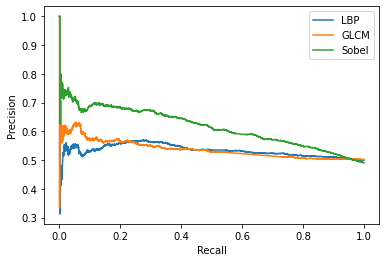

In [68]:
# SVM - linear

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/PR-linear', format='png')
plt.show()

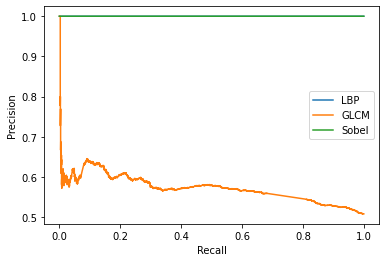

In [48]:
# SVM - linear - train

y_pred_prob1 = clf_lbp.predict_proba(X_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_lbp, y_pred_prob1)

y_pred_prob2 = clf_glcm.predict_proba(X_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_glcm, y_pred_prob2)

y_pred_prob3 = clf_sobel.predict_proba(X_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(y_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/PR-linear-train', format='png')
plt.show()

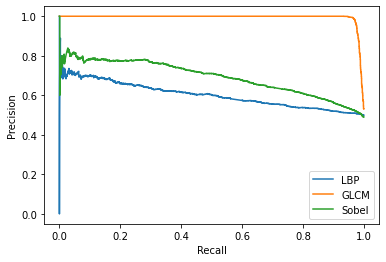

In [69]:
# SVM - polinomial

y_pred_prob1 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/PR-poly', format='png')
plt.show()

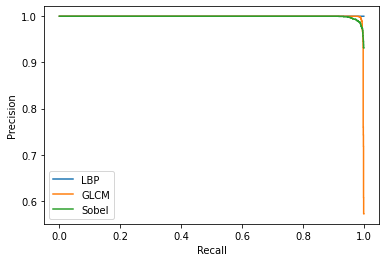

In [109]:
# SVM - polinomial - train

y_pred_prob1 = clf2_lbp.predict_proba(X_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_lbp, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(X_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_glcm, y_pred_prob2)

y_pred_prob3 = clf2_sobel.predict_proba(X_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(y_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/PR-poly-train', format='png')
plt.show()

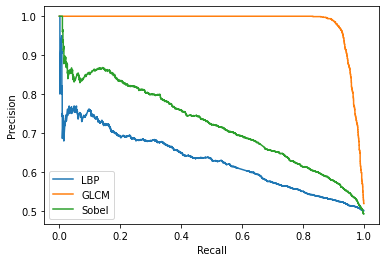

In [70]:
# SVM - rbf

y_pred_prob1 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

#plt.savefig('Relatório/PR1', format='png')
plt.show()

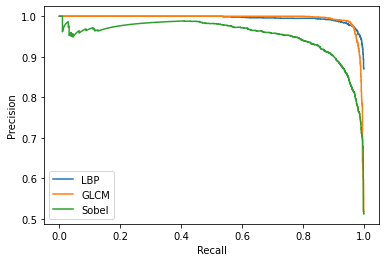

In [132]:
# SVM - rbf - train

y_pred_prob1 = clf3_lbp.predict_proba(X_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(y_lbp, y_pred_prob1)

y_pred_prob2 = clf3_glcm.predict_proba(X_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(y_glcm, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(X_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(y_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/PR-linear-train', format='png')
plt.show()

### F1-Score - SVM 

##### Linear

In [71]:
metrics.f1_score(yt_lbp, y_pred_linear_lbp)

0.5348368908578331

In [105]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_lbp, y_pred_linear_lbp).ravel()
(tn, fp, fn, tp)

(1362, 1144, 1166, 1328)

In [72]:
metrics.f1_score(yt_glcm, y_pred_linear_glcm)

0.5652173913043478

In [106]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_glcm, y_pred_linear_glcm).ravel()
(tn, fp, fn, tp)

(1073, 1417, 963, 1547)

In [73]:
metrics.f1_score(yt_sobel, y_pred_linear_sobel)

0.5922310351840554

In [107]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_sobel, y_pred_linear_sobel).ravel()
(tn, fp, fn, tp)

(1539, 1011, 994, 1456)

###### Model 01

##### Polynomial

In [74]:
metrics.f1_score(yt_lbp, y_pred_poly_lbp) 

0.5780783767654664

In [108]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_lbp, y_pred_poly_lbp).ravel()
(tn, fp, fn, tp)

(1426, 1080, 1041, 1453)

In [75]:
metrics.f1_score(yt_glcm, y_pred_poly_glcm)

0.9500104580631668

In [109]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_glcm, y_pred_poly_glcm).ravel()
(tn, fp, fn, tp)

(2490, 0, 239, 2271)

In [76]:
metrics.f1_score(yt_sobel, y_pred_poly_sobel)

0.6770339465200076

In [110]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_sobel, y_pred_poly_sobel).ravel()
(tn, fp, fn, tp)

(1512, 1038, 665, 1785)

##### RBF

In [77]:
metrics.f1_score(yt_lbp, y_pred_rbf_lbp)

0.6052419354838711

In [111]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_lbp, y_pred_rbf_lbp).ravel()
(tn, fp, fn, tp)

(1541, 965, 993, 1501)

In [78]:
metrics.f1_score(yt_glcm, y_pred_rbf_glcm)

0.9053641517662452

In [112]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_glcm, y_pred_rbf_glcm).ravel()
(tn, fp, fn, tp)

(2490, 0, 434, 2076)

In [79]:
metrics.f1_score(yt_sobel, y_pred_rbf_sobel)

0.6674811647322338

In [113]:
tn, fp, fn, tp = metrics.confusion_matrix(yt_sobel, y_pred_rbf_sobel).ravel()
(tn, fp, fn, tp)

(1728, 822, 811, 1639)

### Curva ROC - MLP

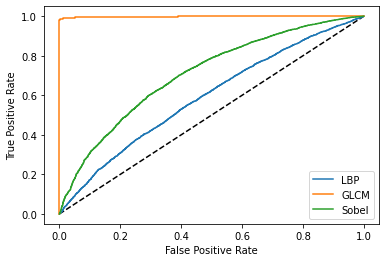

In [62]:
# MLP - 1 layer (1024)

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/ROC-MLP1', format='png')
plt.show()

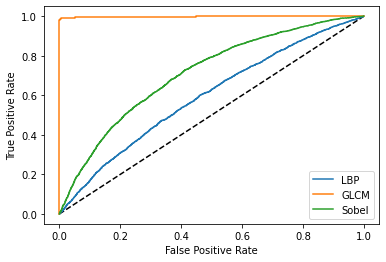

In [63]:
# MLP - 3 layers (128, 64, 32)

y_pred_prob1 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/ROC-MLP3', format='png')
plt.show()

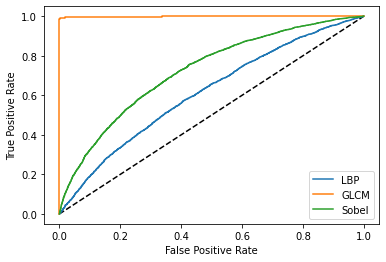

In [64]:
# MLP - 5 layers (512, 256, 128, 64, 32)

y_pred_prob1 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
fpr1 , tpr1, thresholds1 = metrics.roc_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
fpr2 , tpr2, thresholds2 = metrics.roc_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
fpr3 , tpr3, thresholds3 = metrics.roc_curve(yt_sobel, y_pred_prob3)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "LBP")
plt.plot(fpr2, tpr2, label= "GLCM")
plt.plot(fpr3, tpr3, label= "Sobel")
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/ROC-MLP5', format='png')
plt.show()

### Precision-Recall - MLP

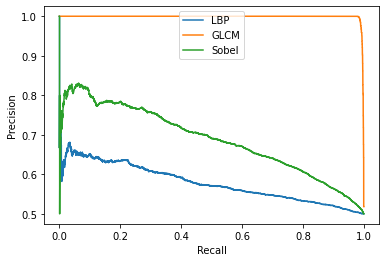

In [65]:
# MLP - 1 layer (1024)

y_pred_prob1 = clf_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/PR-MLP', format='png')
plt.show()

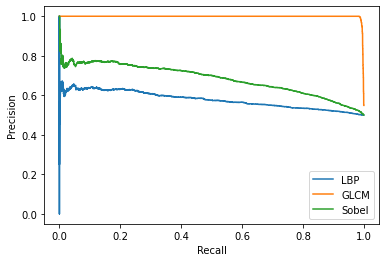

In [66]:
# MLP - 3 layers (128, 64, 32)

y_pred_prob1 = clf2_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf2_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf2_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/PR-MLP3', format='png')
plt.show()

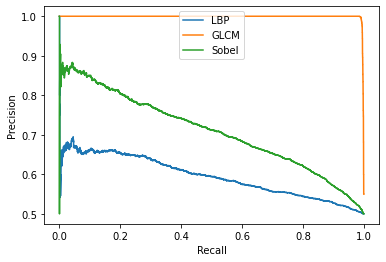

In [67]:
# MLP - 5 layers (512, 256, 128, 64, 32)

y_pred_prob1 = clf3_lbp.predict_proba(Xt_lbp)[:,1]
precision1, recall1, thresholds1 = metrics.precision_recall_curve(yt_lbp, y_pred_prob1)

y_pred_prob2 = clf3_glcm.predict_proba(Xt_glcm)[:,1]
precision2, recall2, thresholds2 = metrics.precision_recall_curve(yt_glcm, y_pred_prob2)

y_pred_prob3 = clf3_sobel.predict_proba(Xt_sobel)[:,1]
precision3, recall3, thresholds3 = metrics.precision_recall_curve(yt_sobel, y_pred_prob3)

#plt.plot([0,1],[0,1], 'k--')
plt.plot(recall1, precision1, label= "LBP")
plt.plot(recall2, precision2, label= "GLCM")
plt.plot(recall3, precision3, label= "Sobel")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
#plt.title('Receiver Operating Characteristic')

plt.savefig('Relatório/PR-MLP5', format='png')
plt.show()

### F1-Score - MLP

##### Model 1

In [68]:
metrics.f1_score(yt_lbp, y_pred_1_lbp)

0.5662136692788414

In [69]:
metrics.f1_score(yt_glcm, y_pred_1_glcm)

0.9896969696969697

In [70]:
metrics.f1_score(yt_sobel, y_pred_1_sobel)

0.6699619771863118

##### Model 2

In [71]:
metrics.f1_score(yt_lbp, y_pred_3_lbp) 

0.6226188433155997

In [72]:
metrics.f1_score(yt_glcm, y_pred_3_glcm)

0.9921481779746327

In [73]:
metrics.f1_score(yt_sobel, y_pred_3_sobel)

0.6804047154924348

##### Model 3

In [74]:
metrics.f1_score(yt_lbp, y_pred_5_lbp)

0.5720693170234454

In [75]:
metrics.f1_score(yt_glcm, y_pred_5_glcm)

0.9933628318584071

In [76]:
metrics.f1_score(yt_sobel, y_pred_5_sobel)

0.6780828470295609

### Análise de Resultados - SVM - LBP

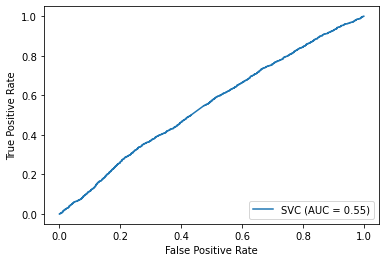

In [80]:
# SVM-linear-LBP: CURVA ROC

metrics.plot_roc_curve(clf_lbp, Xt_lbp, yt_lbp)  

plt.show()                                   

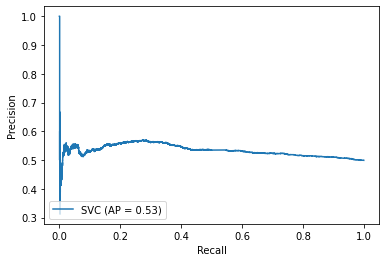

In [81]:
# SVM-linear-LBP: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf_lbp, Xt_lbp, yt_lbp)

plt.show()    

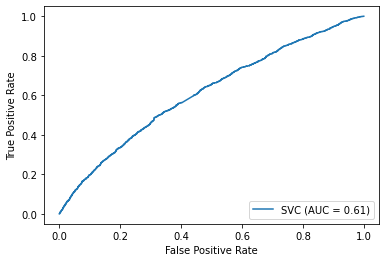

In [82]:
# SVM-polinomial-LBP: CURVA ROC

metrics.plot_roc_curve(clf2_lbp, Xt_lbp, yt_lbp)  

plt.show()                                   

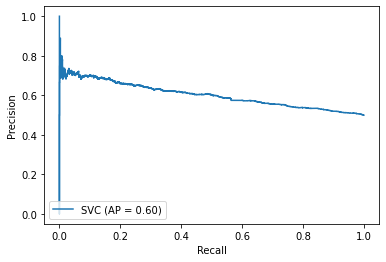

In [83]:
# SVM-polinomial-LBP: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf2_lbp, Xt_lbp, yt_lbp)

plt.show()    

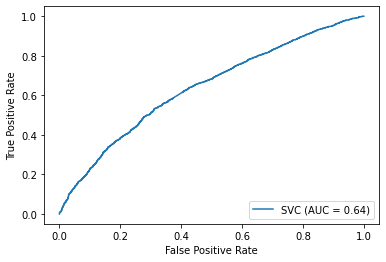

In [84]:
# SVM-rbf-LBP: CURVA ROC

metrics.plot_roc_curve(clf3_lbp, Xt_lbp, yt_lbp)  

plt.show()                                   

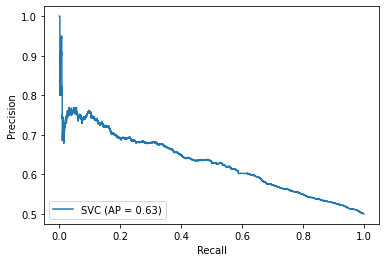

In [85]:
# SVM-rbf-LBP: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf3_lbp, Xt_lbp, yt_lbp)

plt.show()    

### Análise de Resultados - SVM - GLCM

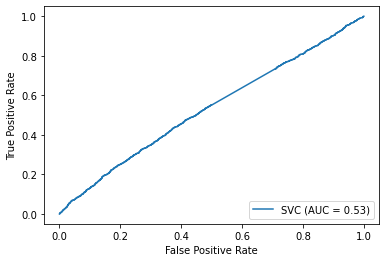

In [86]:
# SVM-linear-GLCM: CURVA ROC

metrics.plot_roc_curve(clf_glcm, Xt_glcm, yt_glcm)  

plt.show()                                   

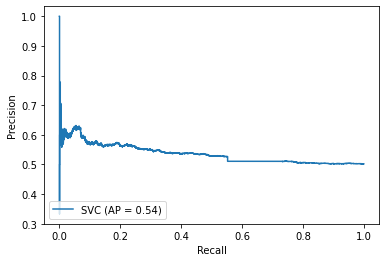

In [87]:
# SVM-linear-GLCM: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf_glcm, Xt_glcm, yt_glcm)

plt.show()    

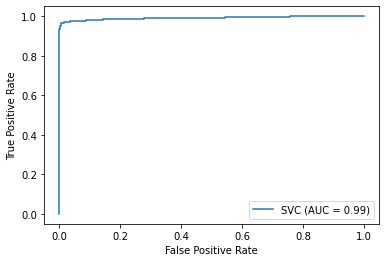

In [88]:
# SVM-polinomial-GLCM: CURVA ROC

metrics.plot_roc_curve(clf2_glcm, Xt_glcm, yt_glcm)  

plt.show()                                   

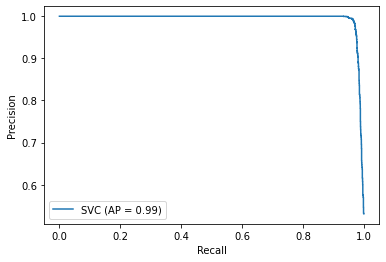

In [89]:
# SVM-polinomial-GLCM: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf2_glcm, Xt_glcm, yt_glcm)

plt.show()    

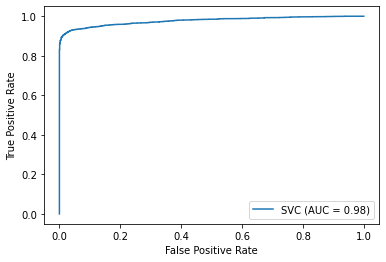

In [90]:
# SVM-rbf-GLCM: CURVA ROC

metrics.plot_roc_curve(clf3_glcm, Xt_glcm, yt_glcm)  

plt.show()                                   

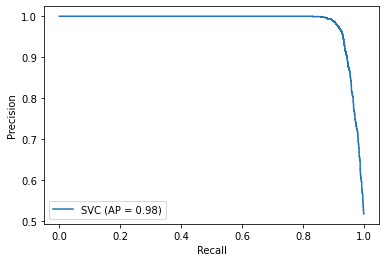

In [91]:
# SVM-rbf-GLCM: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf3_glcm, Xt_glcm, yt_glcm)

plt.show()    

### Análise de Resultados - SVM - SOBEL

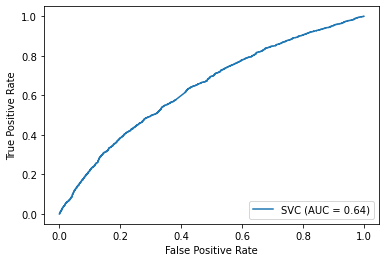

In [92]:
# SVM-linear-SOBEL: CURVA ROC

metrics.plot_roc_curve(clf_sobel, Xt_sobel, yt_sobel)  

plt.show()                                   

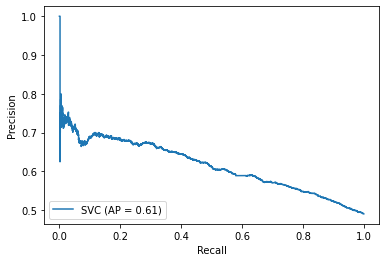

In [93]:
# SVM-linear-SOBEL: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf_sobel, Xt_sobel, yt_sobel)

plt.show()    

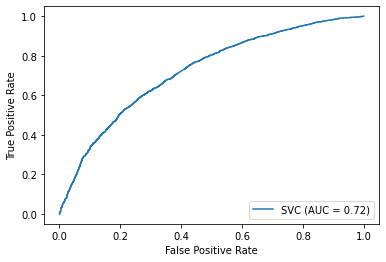

In [94]:
# SVM-polinomial-SOBEL: CURVA ROC

metrics.plot_roc_curve(clf2_sobel, Xt_sobel, yt_sobel)  

plt.show()                                   

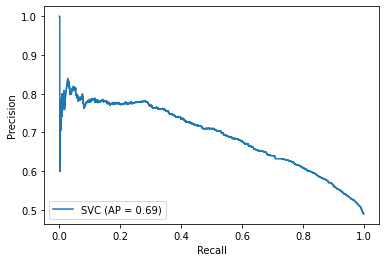

In [95]:
# SVM-polinomial-LBP: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf2_sobel, Xt_sobel, yt_sobel)

plt.show()    

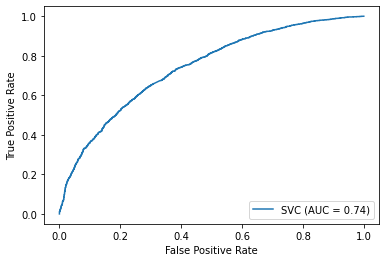

In [96]:
# SVM-rbf-SOBEL: CURVA ROC

metrics.plot_roc_curve(clf3_sobel, Xt_sobel, yt_sobel)  

plt.show()                                   

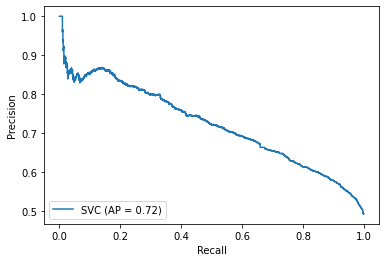

In [97]:
# SVM-rbf-SOBEL: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf3_sobel, Xt_sobel, yt_sobel)

plt.show()    

### Análise de Resultados - MLP - LBP

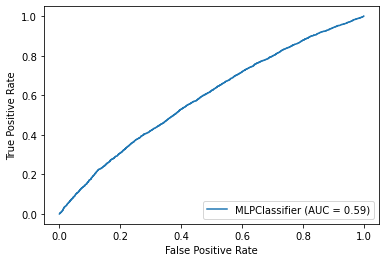

In [77]:
# Model 1: CURVA ROC

metrics.plot_roc_curve(clf_lbp, Xt_lbp, yt_lbp)  

plt.show()                                   

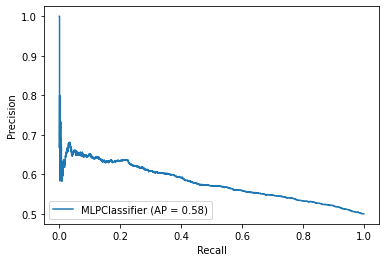

In [78]:
# Model 1: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf_lbp, Xt_lbp, yt_lbp)

plt.show()    

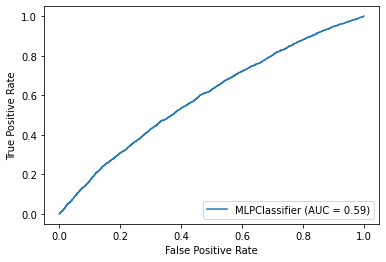

In [79]:
# Model 2: CURVA ROC

metrics.plot_roc_curve(clf2_lbp, Xt_lbp, yt_lbp)  

plt.show()                                   

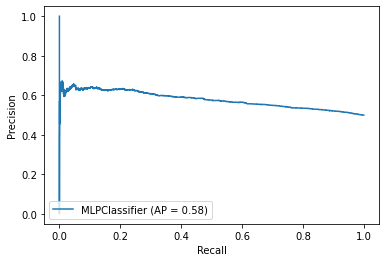

In [80]:
# Model 2: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf2_lbp, Xt_lbp, yt_lbp)

plt.show()    

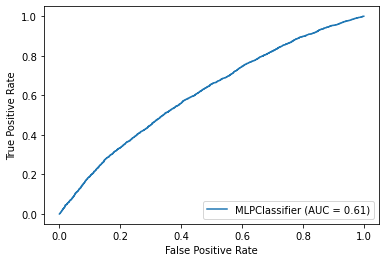

In [81]:
# Model 3: CURVA ROC

metrics.plot_roc_curve(clf3_lbp, Xt_lbp, yt_lbp)  

plt.show()                                   

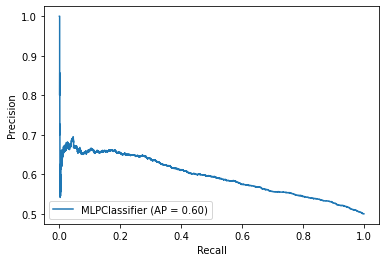

In [82]:
# Model 3: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf3_lbp, Xt_lbp, yt_lbp)

plt.show()    

### Análise de Resultados - MLP - GLCM

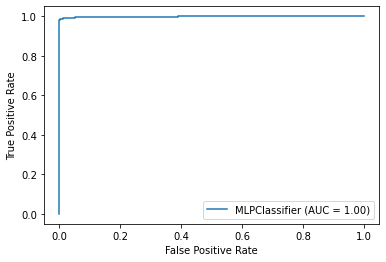

In [83]:
# MLP-1-GLCM: CURVA ROC

metrics.plot_roc_curve(clf_glcm, Xt_glcm, yt_glcm)  

plt.show()                                   

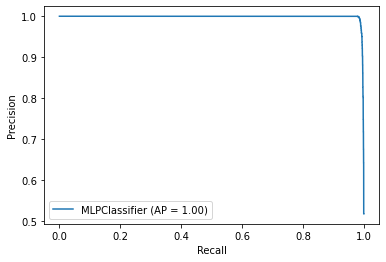

In [84]:
# MLP-1-GLCM: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf_glcm, Xt_glcm, yt_glcm)

plt.show()    

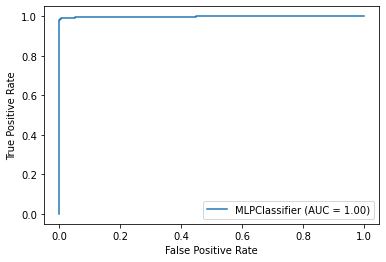

In [85]:
# MLP-2-GLCM: CURVA ROC

metrics.plot_roc_curve(clf2_glcm, Xt_glcm, yt_glcm)  

plt.show()                                   

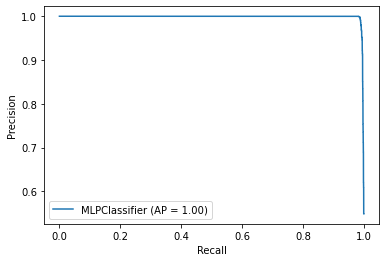

In [86]:
# MLP-2-GLCM: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf2_glcm, Xt_glcm, yt_glcm)

plt.show()    

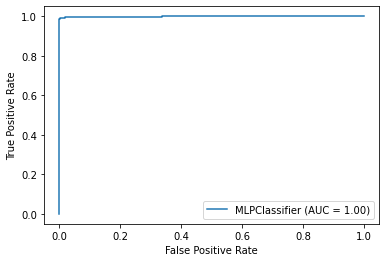

In [87]:
# MLP-3-GLCM: CURVA ROC

metrics.plot_roc_curve(clf3_glcm, Xt_glcm, yt_glcm)  

plt.show()                                   

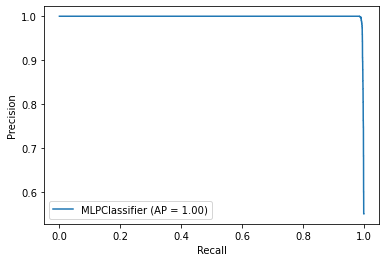

In [88]:
# MLP-3-GLCM: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf3_glcm, Xt_glcm, yt_glcm)

plt.show()    

### Análise de Resultados - MLP - SOBEL

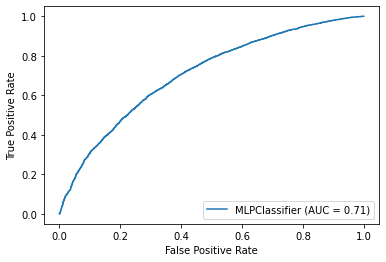

In [89]:
# MLP-1-SOBEL: CURVA ROC

metrics.plot_roc_curve(clf_sobel, Xt_sobel, yt_sobel)  

plt.show()                                   

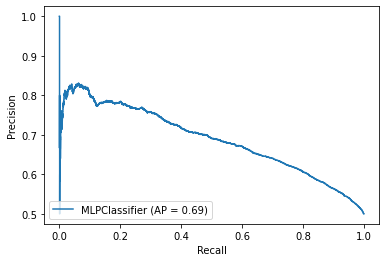

In [90]:
# MLP-1-SOBEL: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf_sobel, Xt_sobel, yt_sobel)

plt.show()    

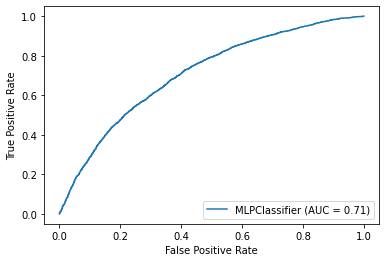

In [91]:
# MLP-2-SOBEL: CURVA ROC

metrics.plot_roc_curve(clf2_sobel, Xt_sobel, yt_sobel)  

plt.show()                                   

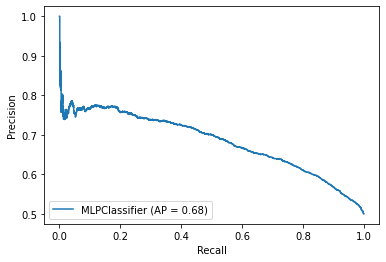

In [92]:
# MLP-2-LBP: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf2_sobel, Xt_sobel, yt_sobel)

plt.show()    

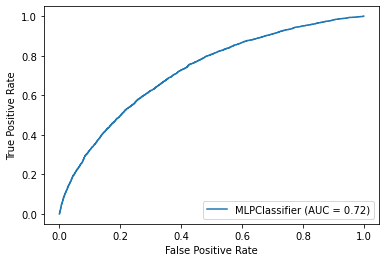

In [93]:
# MLP-3-SOBEL: CURVA ROC

metrics.plot_roc_curve(clf3_sobel, Xt_sobel, yt_sobel)  

plt.show()                                   

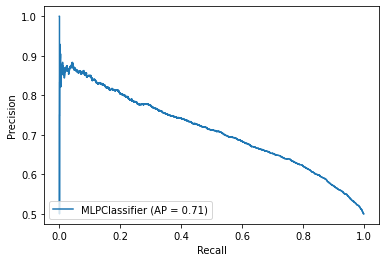

In [94]:
# MLP-3-SOBEL: PRECISION-RECALL

metrics.plot_precision_recall_curve(clf3_sobel, Xt_sobel, yt_sobel)

plt.show()    